# Brief 7 - 
---

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from joblib import dump
%matplotlib inline
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('DATA/RAW/cars.csv')
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
197,198,-1,volvo 245,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515.0
79,80,1,mitsubishi g4,gas,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689.0
38,39,0,honda civic 1300,gas,std,two,hatchback,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,9095.0
52,53,1,mazda rx2 coupe,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795.0
178,179,3,toyota corolla liftback,gas,std,two,hatchback,rwd,front,102.9,...,171,mpfi,3.27,3.35,9.3,161,5200,20,24,16558.0


## Phase expérimentale
---

### 1 - Nettoyage :
---

In [11]:
print(df.shape)
df.info()

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    

In [12]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


##### Véhicule (Marque / Modele)
---

In [13]:
df[['marque','modele']] = df['CarName'].str.split(' ', n=1, expand=True)
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,marque,modele
130,131,0,renault 12tl,gas,std,four,wagon,fwd,front,96.1,...,3.46,3.90,8.7,90,5100,23,31,9295.0,renault,12tl
118,119,1,plymouth fury iii,gas,std,two,hatchback,fwd,front,93.7,...,2.97,3.23,9.4,68,5500,37,41,5572.0,plymouth,fury iii
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,...,3.74,2.90,9.5,207,5900,17,25,37028.0,porsche,boxter
141,142,0,subaru,gas,std,four,sedan,fwd,front,97.2,...,3.62,2.64,9.5,82,4800,32,37,7126.0,subaru,None
193,194,0,volkswagen dasher,gas,std,four,wagon,fwd,front,100.4,...,3.19,3.40,9.0,88,5500,25,31,12290.0,volkswagen,dasher


In [14]:
df['marque'] = df['marque'].replace('alfa-romero', 'alfa-romeo')
df['marque'] = df['marque'].replace('Nissan', 'nissan')
df['marque'] = df['marque'].replace('porcshce', 'porsche')
df['marque'] = df['marque'].replace('Nissan', 'nissan')
df['marque'] = df['marque'].replace('maxda', 'mazda')
df['marque'] = df['marque'].replace('vokswagen', 'volkswagen')
df['marque'] = df['marque'].replace('vw', 'volkswagen')
df['marque'] = df['marque'].replace('toyouta', 'toyota')
df['marque'] = df['marque'].astype('str')

In [15]:
df['modele'].unique()

array(['giulia', 'stelvio', 'Quadrifoglio', '100 ls', '100ls', 'fox',
       '5000', '4000', '5000s (diesel)', '320i', 'x1', 'x3', 'z4', 'x4',
       'x5', 'impala', 'monte carlo', 'vega 2300', 'rampage',
       'challenger se', 'd200', 'monaco (sw)', 'colt hardtop',
       'colt (sw)', 'coronet custom', 'dart custom',
       'coronet custom (sw)', 'civic', 'civic cvcc', 'accord cvcc',
       'accord lx', 'civic 1500 gl', 'accord', 'civic 1300', 'prelude',
       'civic (auto)', 'MU-X', 'D-Max ', 'D-Max V-Cross', 'xj', 'xf',
       'xk', 'rx3', 'glc deluxe', 'rx2 coupe', 'rx-4', '626', 'glc',
       'rx-7 gs', 'glc 4', 'glc custom l', 'glc custom',
       'electra 225 custom', 'century luxus (sw)', 'century', 'skyhawk',
       'opel isuzu deluxe', 'skylark', 'century special',
       'regal sport coupe (turbo)', 'cougar', 'mirage', 'lancer',
       'outlander', 'g4', 'mirage g4', 'montero', 'pajero', 'versa',
       'gt-r', 'rogue', 'latio', 'titan', 'leaf', 'juke', 'note',
       'cli

In [16]:
df[df['modele']=='gt-r']

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,marque,modele
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,...,2.99,3.47,21.9,55,4800,45,50,7099.0,nissan,gt-r


##### Nombre de portes
---

In [17]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [18]:
df['doornumber'] = df['doornumber'].replace('two', '2')
df['doornumber'] = df['doornumber'].replace('four', '4')
df['doornumber'] = df['doornumber'].astype('int')
df['doornumber'].sample(5)

4      4
23     2
171    2
92     4
6      4
Name: doornumber, dtype: int32

##### Nombre de cylindre
---

In [19]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [20]:
df['cylindernumber'] = df['cylindernumber'].replace('two', '2')
df['cylindernumber'] = df['cylindernumber'].replace('three', '3')
df['cylindernumber'] = df['cylindernumber'].replace('four', '4')
df['cylindernumber'] = df['cylindernumber'].replace('five', '5')
df['cylindernumber'] = df['cylindernumber'].replace('six', '6')
df['cylindernumber'] = df['cylindernumber'].replace('eight', '8')
df['cylindernumber'] = df['cylindernumber'].replace('twelve', '12')
df['cylindernumber'] = df['cylindernumber'].astype('int')
df['cylindernumber'].sample(5)

110    4
97     4
98     4
53     4
10     4
Name: cylindernumber, dtype: int32

### 2 - Prix moyen : 
---

In [21]:
df_means = df.groupby('modele').price.mean().sort_values(ascending = False)
df_means

modele
regal sport coupe (turbo)    45400.0
x5                           41315.0
century special              40960.0
boxter                       37028.0
xk                           36000.0
                              ...   
versa                         5499.0
mirage                        5389.0
corona mark ii                5348.0
rx3                           5195.0
impala                        5151.0
Name: price, Length: 141, dtype: float64

### 3 - Ordre de prix : 
---

In [22]:
chi = (df_means.max()-df_means.min())
a = (chi/100)*25
b = (chi/100)*75
a, b 
df.loc[df['price'] <= a, 'order_price'] = 'cheap'
df.loc[df['price'].between(a,b), 'order_price'] = 'medium'
df.loc[df['price'] >= b, 'order_price'] = 'high'
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,marque,modele,order_price
190,191,3,vw rabbit,gas,std,2,hatchback,fwd,front,94.5,...,3.400,8.5,90,5500,24,29,9980.0,volkswagen,rabbit,cheap
195,196,-1,volvo 144ea,gas,std,4,wagon,rwd,front,104.3,...,3.150,9.5,114,5400,23,28,13415.0,volvo,144ea,medium
58,59,3,mazda glc 4,gas,std,2,hatchback,rwd,front,95.3,...,3.255,9.4,135,6000,16,23,15645.0,mazda,glc 4,medium
127,128,3,porsche cayenne,gas,std,2,hardtop,rwd,rear,89.5,...,2.900,9.5,207,5900,17,25,34028.0,porsche,cayenne,high
31,32,2,honda civic cvcc,gas,std,2,hatchback,fwd,front,86.6,...,3.410,9.2,76,6000,31,38,6855.0,honda,civic cvcc,cheap


### 4 - Régression simple : 
---

Coef : 
 [[12.73297806]] 

Erreur moyenne : 3087.38
Coef R² : 0.84


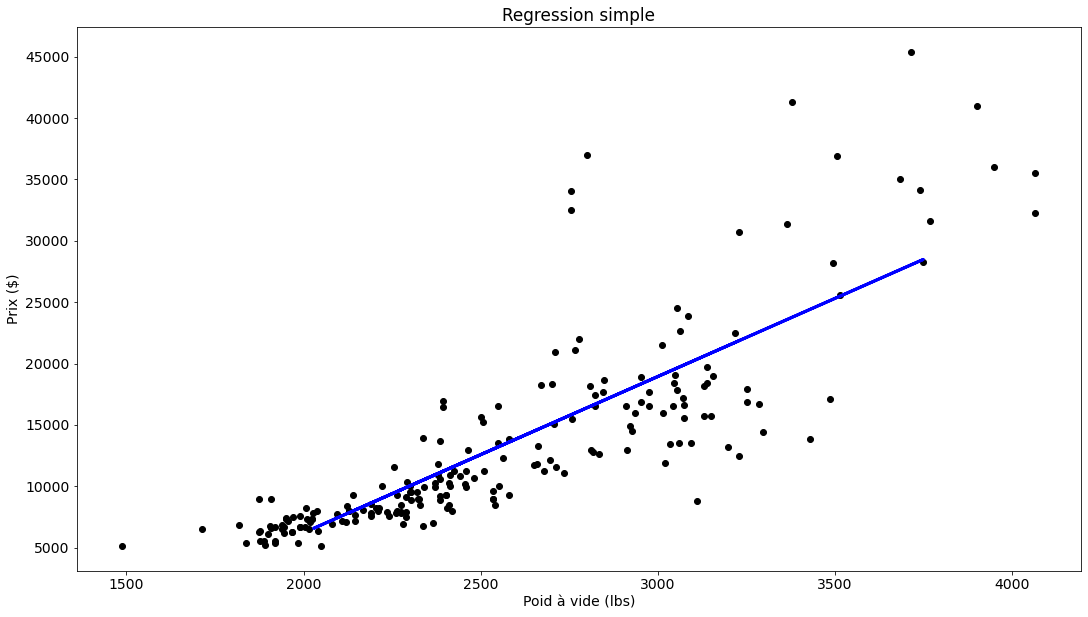

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(df["curbweight"][:, np.newaxis], 
                                                    df["price"][:, np.newaxis], 
                                                    test_size=0.05, 
                                                    random_state=42)
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)

print('Coef : \n', regr.coef_, '\n')
print('Erreur moyenne : %.2f'
      % np.sqrt(mean_squared_error(Y_test, Y_pred)))
print('Coef R² : %.2f'
      % r2_score(Y_test, Y_pred))

plt.figure(figsize=(18, 10))
plt.rc('font', size=14)

plt.scatter(df["curbweight"][:, np.newaxis], 
            df["price"][:, np.newaxis],  
            color='black')
plt.plot(X_test, 
         Y_pred, 
         color='blue', 
         linewidth=3)
plt.title('Regression simple')
plt.xlabel('Poid à vide (lbs)')
plt.ylabel('Prix ($)')
plt.xticks()
plt.yticks()
plt.show()

In [24]:
def Reg_simpl_sm(X,Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y,X)
    results = model.fit()

    results.params
    results.tvalues

    print(results.t_test([1, 0]))
    print(results.f_test(np.identity(2)))
    
print("Library statmodel, simple")
Reg_simpl_sm(df["curbweight"],df["price"])

Library statmodel, simple
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0         -1.948e+04   1543.962    -12.614      0.000   -2.25e+04   -1.64e+04
<F test: F=array([[1166.29090608]]), p=4.977011181044311e-112, df_denom=203, df_num=2>


### 5 - Régression multiple : 
---

In [25]:
def Reg_multi_sm(X,Y):
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    dump(model, 'model.joblib')
    predictions = model.predict(X) 
 
    print_model = model.summary()
    print(print_model)
    
print("Library statmodel, multi")
Reg_multi_sm(df[["curbweight","enginesize"]],df["price"])

Library statmodel, multi
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     390.7
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           3.77e-70
Time:                        14:26:42   Log-Likelihood:                -1970.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.415e+04   138

### 6 - Variables catégorielles : 
---

In [26]:
#Variable catégorielle
df_cat = df[['symboling',
             'fueltype', 
             'aspiration', 
             'carbody', 
             'drivewheel', 
             'enginelocation', 
             'enginetype', 
             'fuelsystem', 
             'cylindernumber']].astype('str')
df_cat['symboling']= df['symboling'].astype('str')
#Make df categorial One-hot encode
df_categorial = pd.get_dummies(df_cat)
# Scale df num 
df_num = df [['doornumber', 
              'wheelbase', 
              'carlength',
              'carwidth', 
              'carheight', 
              'curbweight', 
              'boreratio',
              'stroke', 
              'compressionratio', 
              'horsepower', 
              'peakrpm', 
              'highwaympg', 
              'price']]
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df_num)
df_num_scale = pd.DataFrame(X_train_minmax)
df_num_scale.columns = ['doornumber', 
                        'wheelbase', 
                        'carlength',
                        'carwidth', 
                        'carheight', 
                        'curbweight', 
                        'boreratio',
                        'stroke', 
                        'compressionratio', 
                        'horsepower', 
                        'peakrpm', 
                        'highwaympg', 
                        'price']
df_num_scale.sample(5)

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price
28,1.0,0.486880,0.500000,0.358333,1.000000,0.406129,0.571429,0.661905,0.09375,0.166667,0.346939,0.368421,0.094409
36,1.0,0.288630,0.238806,0.300000,0.875000,0.207913,0.271429,0.638095,0.13750,0.116667,0.755102,0.473684,0.054044
48,1.0,0.769679,0.873134,0.775000,0.416667,1.000000,0.778571,1.000000,0.06875,0.533333,0.244898,0.078947,0.755474
101,1.0,0.402332,0.605970,0.516667,0.608333,0.623351,0.635714,0.571429,0.12500,0.433333,0.428571,0.157895,0.208058
193,1.0,0.402332,0.626866,0.550000,0.608333,0.416990,0.464286,0.633333,0.12500,0.166667,0.551020,0.394737,0.178045


In [27]:
#Concate Num & categorial 
df_concate = pd.concat([df_categorial, df_num_scale], axis = 1)
df_concate.shape

(205, 55)

In [28]:
Reg_multi_sm(df_concate.drop(columns=['price']),df_concate['price'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     56.03
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           5.03e-77
Time:                        14:26:42   Log-Likelihood:                 325.23
No. Observations:                 205   AIC:                            -562.5
Df Residuals:                     161   BIC:                            -416.3
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0452 

### 7 - Validation croisée : 
---

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(df["curbweight"][:, np.newaxis], 
                                                    df["price"][:, np.newaxis], 
                                                    test_size=0.30, 
                                                    random_state=42)

# print(Reg_simpl_sm(X_train,Y_train))
# print(Reg_simpl_sm(X_test,Y_test))
linear_model.LinearRegression().fit(X_train,  Y_train)

LinearRegression()

In [30]:
Y_pred_train = regr.predict(X_train)
Y_pred_test = regr.predict(X_test)

print('Coef R² train : %.2f'
      % r2_score(Y_train, Y_pred_train))

print('Coef R² test : %.2f'
      % r2_score(Y_test, Y_pred_test))

Coef R² train : 0.70
Coef R² test : 0.69


## Déploiement
---

### Entrainement model : 
---

In [31]:
#Variable catégorielle
df_cat = df[['cylindernumber']].astype('str')
#Make df categorial One-hot encode
df_categorial = pd.get_dummies(df_cat)
# Scale df num 
df_num = df [['carlength',
              'carwidth', 
              'curbweight', 
              'compressionratio', 
              'horsepower', 
              'highwaympg', 
              'price']]
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(df_num)
df_num_scale = pd.DataFrame(X_train_minmax)
df_num_scale.columns = ['carlength',
                        'carwidth', 
                        'curbweight', 
                        'compressionratio', 
                        'horsepower', 
                        'highwaympg', 
                        'price']
df_num_scale.sample(5)
#Concate Num & categorial 
df_concate = pd.concat([df_categorial, df_num_scale], axis = 1)
df_concate.shape

(205, 14)

In [32]:
Reg_multi_sm(df_concate.drop(columns=['price']),df_concate['price'])

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     80.86
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           2.73e-68
Time:                        14:26:43   Log-Likelihood:                 225.85
No. Observations:                 205   AIC:                            -425.7
Df Residuals:                     192   BIC:                            -382.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0074      0.05